# Confusion Matrix

分類器の性能を記述する図や表のこと。出力が1(Positive)、0(Negative)のいずれかである二値分類器を想定する。

|実際\\予測|予測がPositive|予測がNegative|
|:--:|:--:|:--:|
|**実際がPositive**|真陽性<br>True Positive(TP)|偽陰性<br>False Negative(FN)<br>第2種過誤|
|**実際がNegative**|偽陽性<br>False Positive(FP)<br>第1種過誤|真陰性<br>True Negative(TN)|

取り組む問題によって、偽陰性(FN)または偽陽性(FP)いずれか一方を小さくするようなアルゴリズム最適化が必要になることがある。

例えば**生体認証**の場合、実際はFalseの人が、Positiveと判定されるのが問題なので(見知らぬ人が重要データにアクセスできるから)、
**偽陽性を避けること**が重要。

例えば**ウイルス検査**の場合、実際にTrueの人が、Negativeと判定されるのが問題なので(感染拡大につながるから)、
**偽陰性を避けること**が重要。

* 正解率

 全予測結果のうち、真の値と一致した割合。

 $\frac{TP + TN}{TP + FP + FN + TN}$

* 適合率

 正予測の正答率。間違いの少なさ。

 $\frac{TP}{TP + FP}$
* 再現率

 (実際が)正に対する正答率。漏れの少なさ。

 $\frac{TP}{TP + FN}$
* 特異率

 (実際が)負に対する正答率。

 $\frac{TN}{FP + TN}$

* F1値

 適合率と再現率の調和平均

 $\frac{2 \times Precision \times Recall}{Precision + Recall}$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# 正解と推定結果のラベルの事例を定義する
# 本当は推定結果は何らかの分類器で推定するべきだが、今回の主題ではないので、割愛する
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

`confusion_matrix()`で生成された行列は以下のようにあらわされる。
```
          Predict
          0, 1, 2, ...
Actual 0
       1
       2
       ...
```
二値分類の際、通例`0`をNegative、`1`をPositiveとして扱うため、以下のようになる。
```
0 = Negative
1 = Positive

          Predicted
          0    1
Actual 0  TN   FP
       1  FN   TP
```

In [3]:
# Confusion Matrixの生成
conf_mat = confusion_matrix(true_labels, pred_labels)
print(conf_mat)

[[2 1 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 1 0 2 0]
 [0 0 0 1 1]]


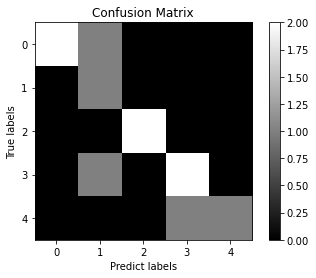

In [4]:
# これをmatplotlibで表現する
plt.imshow(conf_mat, interpolation='nearest',cmap='gist_gray')
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [5]:
# 分類レポート
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print(classification_report(true_labels, pred_labels, target_names=targets))


              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11

